# Travel Insurance
### Created By : Muhammad Damar Yulian Prakarsa

**Business Problem Understanding**

**Context**  
Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik dalam negeri maupun luar negeri. Beberapa negara bahkan telah mewajibkan para pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung dari pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Suatu perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

Target :

0 : Tidak Melakukan klaim asuransi

1 : Melakukan klaim asuransi

**Problem Statement :**

Jika perusahaan memilih target tanpa melakukan penyaringan terlebih dahulu kemungkinan klaim asuransi tidak bisa di prediksi. Proses klaim asuransi bisa memakan sumber daya jika perusahaan salah menganalisa target. Perusahaan ingin menghindari target mana yang memiliki kemungkinan klaim polis asuransi.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang target akan melakukan klaim atau tidak.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan yang melakukan klaim asuransi dan tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan melakukan klaim asuransi atau tidak.

**Metric Evaluation**

![Metric](https://txt.cohere.ai/content/images/size/w2000/2022/06/feature.png)

Type 1 error : False Positive  
Konsekuensi: Tidak mengeluarkan biaya

Type 2 error : False Negative  
Konsekuensi: Kerugian pengeluaran klaim 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost dari perusahaan tersebut. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false negative karena resiko kerugian pengeluaran klaim dapat membuat perusahaan mengeluarkan uang untuk membayar claim sehingga apabila kita salah memprediksi orang yang klaim sebagai yang tidak klaim, perusahaan akan mengeluarkan lebih banyak biaya. Sedangkan jika kita memprediksi client kita yang tidak claim sebagai yang claim tidak akan membuat perusahaan mengeluarkan biaya apapun. Oleh karena itu, kita lebih fokus ke metrik Recall.

In [4]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [6]:
#Load Dataset
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


Keterangan Kolom Dataset :
-	Agency : Nama agen asuransi
-	Agency Type : Jenis agen asuransi (airlines/penerbangan atau travel agency)
-	Distribution Channel : Saluran distribusi agensi (online / offline)
-	Product Name : Nama produk asuransi yang dibeli
-   Gender : jenis kelamin pemegang polis
-	Duration : Durasi perjalanan (hari)
-	Destination : Tujuan perjalanan
-	Net Sales : Total penjualan bersih asuransi perjalanan (jumlah penjualan kotor perusahaan dikurangi retur, tunjangan, dan diskon)
-	Commission (in value) : Komisi yang diterima agensi asuransi perjalanan dari perusahaan asuransi
-	Age : Usia pemegang polis
-	Claim : Status klaim asuransi

## Data Cleaning

### Handling Missing Value

In [7]:
df=df.drop(['Gender'], axis=1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### Handling Data Duplication

In [8]:
df[df.duplicated(keep='first')]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,No


In [9]:
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index().drop(columns = {'index'})
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


In [10]:
df[df.duplicated(keep='first')]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


## Data Analysis

### Decriptive Statistical Data

In [11]:
display(df.describe(),df.describe(include='object'))

,Duration,Net Sales,Commision (in value),Age
count,39324.000000,39324.00000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054
std,113.404932,49.70403,20.345275,13.225494
min,-1.000000,-357.50000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000
50%,25.000000,29.00000,0.000000,36.000000
75%,57.000000,50.00000,11.880000,44.000000
max,4881.000000,810.00000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Destination,Claim
count,39324,39324,39324,39324,39324,39324
unique,16,2,2,26,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,No
freq,20990,28096,38613,11009,8106,38651


kita perlu melihat data dalam grafik untuk melihat apakah ada outlier yang perlu dihilangkan atau tidak. Kita juga dapat melihat bahwa ada salah data dalam durasi yang berisi nilai -1, yang seharusnya tidak boleh 0 atau minus.

In [12]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39324 entries, 0 to 39323
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              39324 non-null  int64  
 1   Net Sales             39324 non-null  float64
 2   Commision (in value)  39324 non-null  float64
 3   Age                   39324 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


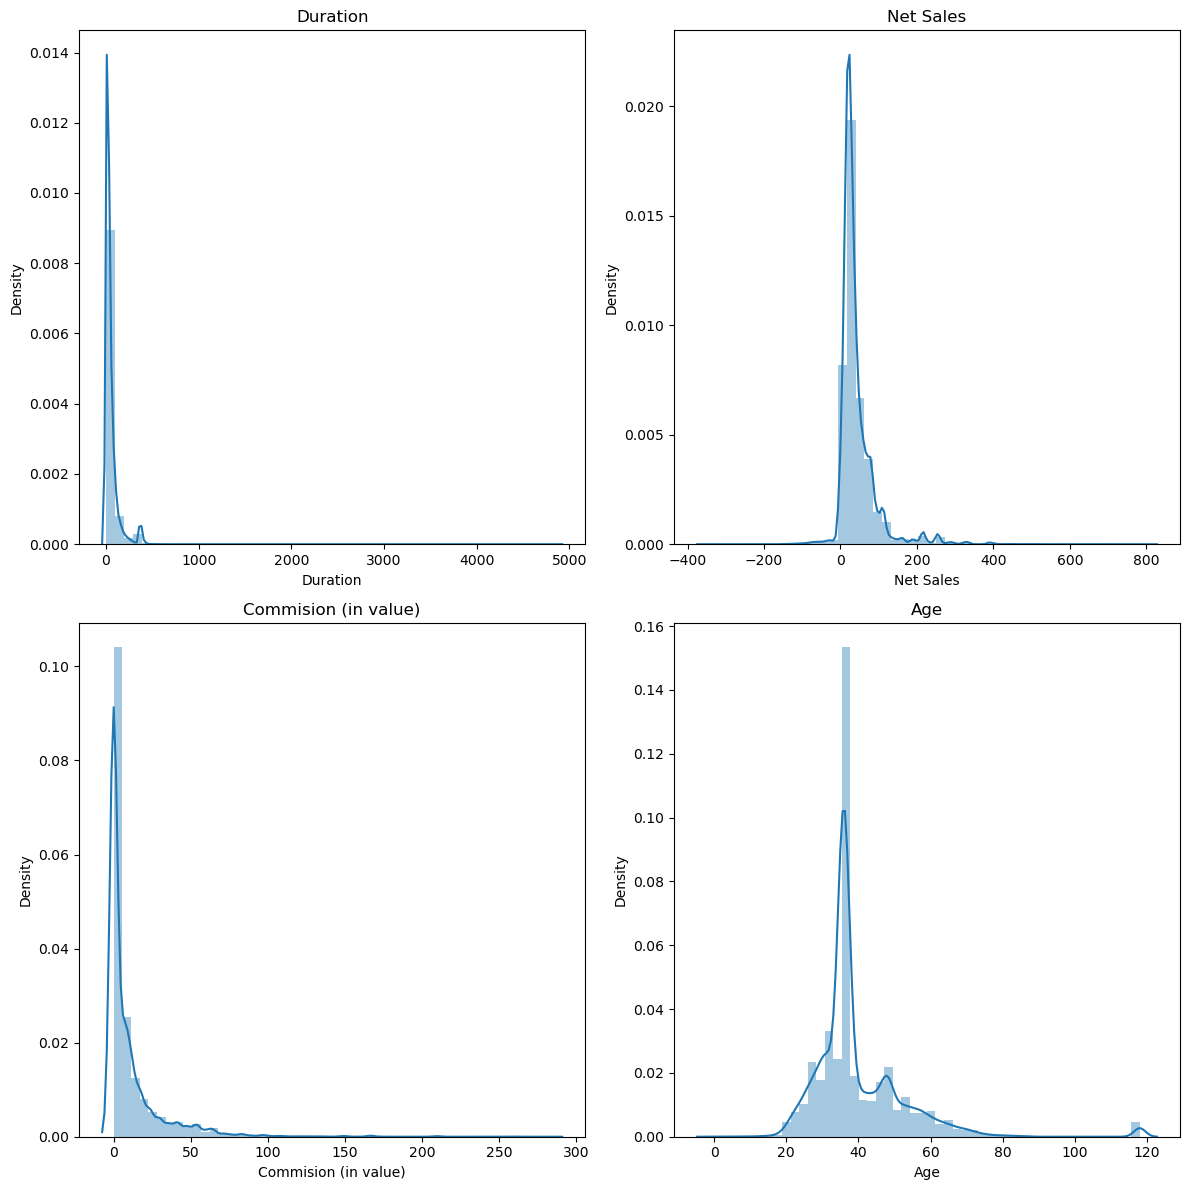

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[col], ax=axs[i])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

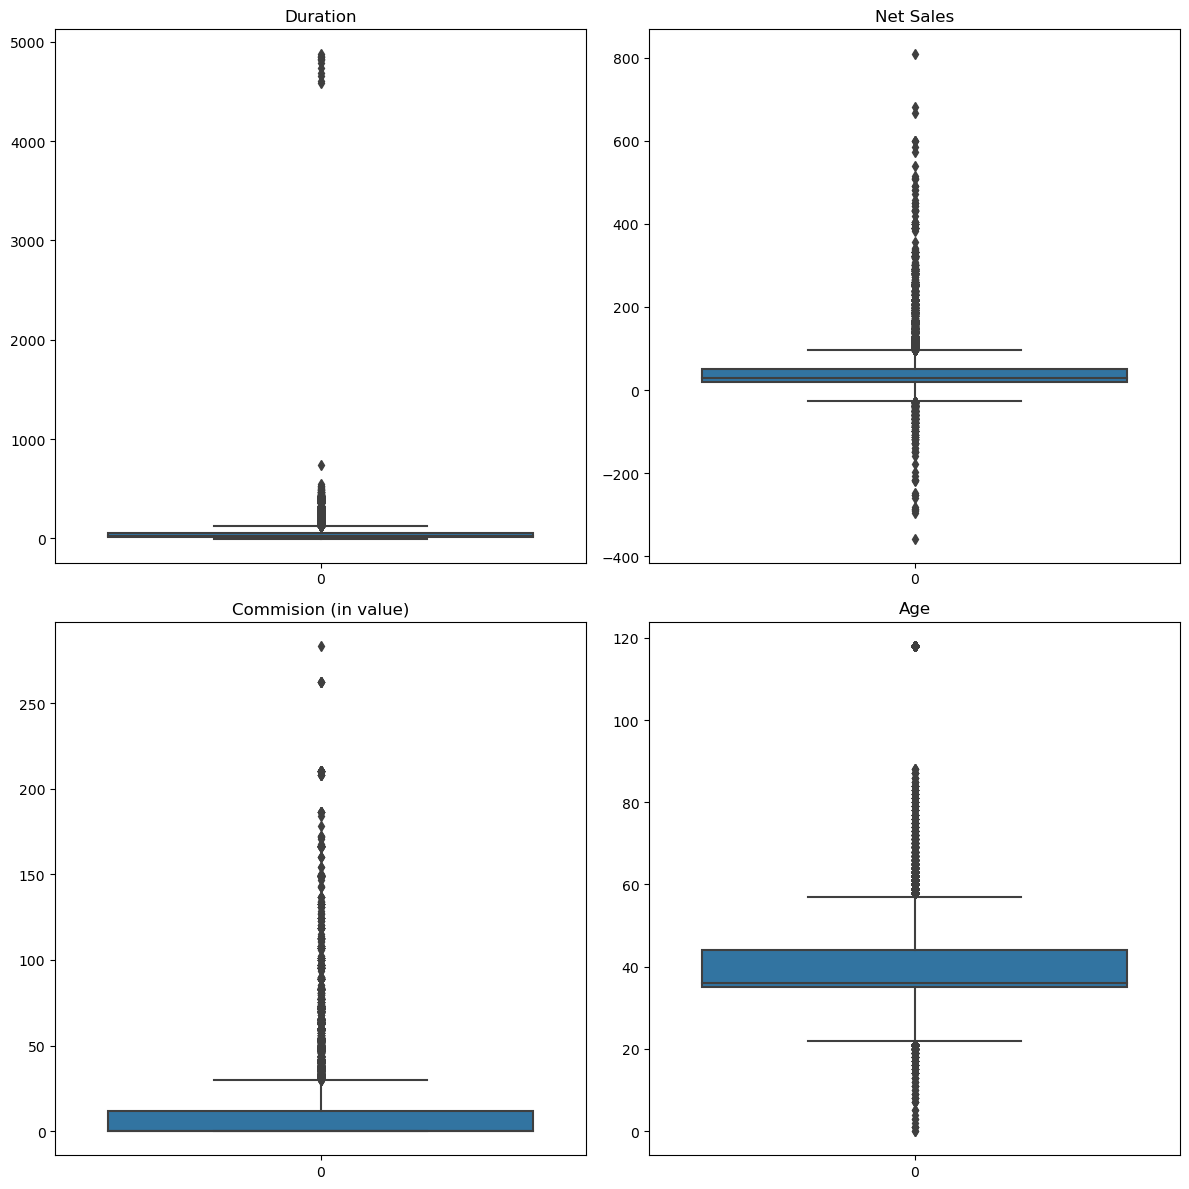

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs = axs.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.boxplot(df_numerical[col], ax=axs[i])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

#### Cek Duration

In [15]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
24015,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
24245,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


In [16]:
df['Duration'] = np.where(df['Duration']<0, np.nan, df['Duration'])

In [17]:
df[df['Destination']=='MALAYSIA'] = df[df['Destination']=='MALAYSIA'].fillna(df[df['Destination']=='MALAYSIA']['Duration'].median())
df[df['Destination']=='BRUNEI DARUSSALAM']= df[df['Destination']=='BRUNEI DARUSSALAM'].fillna(df[df['Destination']=='BRUNEI DARUSSALAM']['Duration'].median())

In [18]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


#### Cek Age

Setelah membaca dari beberapa sumber mengenai travel insurance bahwa range usia yang boleh mendaftar adalah 0-75 tahun. tetapi ada juga yang menerima usia 0-100 tahun. jadi untuk usia > 100 maka akan kita drop karena akan di anggap sebagai outliar

In [19]:
# Show Age > 100 tahun
age_drop = df[df['Age']>100]
age_drop.sort_values(['Age'], ascending=False)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7.0,MALAYSIA,29.0,10.15,118,No
23397,JWT,Airlines,Online,Value Plan,31.0,INDIA,120.0,48.00,118,No
26995,JWT,Airlines,Online,Value Plan,41.0,INDIA,31.0,12.40,118,No
26981,EPX,Travel Agency,Offline,Cancellation Plan,72.0,MALAYSIA,0.0,0.00,118,No
26810,JWT,Airlines,Online,Value Plan,19.0,INDIA,72.0,28.80,118,No
...,...,...,...,...,...,...,...,...,...,...
12195,ART,Airlines,Online,Value Plan,27.0,UNITED KINGDOM,96.0,33.60,118,No
11926,JWT,Airlines,Online,Value Plan,102.0,INDIA,-78.0,31.20,118,No
11861,JWT,Airlines,Online,Value Plan,24.0,INDIA,50.0,20.00,118,No
11799,CCR,Travel Agency,Offline,Comprehensive Plan,6.0,THAILAND,29.0,9.57,118,No


In [20]:
# Drop outliers
df.drop(age_drop.index , inplace=True)

In [21]:
# Show Age > 100 tahun
age_drop = df[df['Age']>100]
age_drop.sort_values(['Age'], ascending=False)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


#### Cek Duration

In [22]:
dur_drop = df[df['Duration']>=700]
dur_drop

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736.0,SINGAPORE,0.32,0.09,48,No
4556,SSI,Airlines,Online,Ticket Protector,4857.0,SINGAPORE,0.32,0.09,48,No
9712,SSI,Airlines,Online,Ticket Protector,4815.0,SINGAPORE,0.32,0.09,48,No
11510,SSI,Airlines,Online,Ticket Protector,4652.0,SINGAPORE,0.32,0.09,48,No
18160,SSI,Airlines,Online,Ticket Protector,4881.0,SINGAPORE,0.13,0.04,48,No
18645,SSI,Airlines,Online,Ticket Protector,4844.0,SINGAPORE,0.32,0.09,48,No
19983,C2B,Airlines,Online,Annual Silver Plan,740.0,SINGAPORE,0.00,54.19,36,No
20550,SSI,Airlines,Online,Ticket Protector,4580.0,SINGAPORE,0.32,0.09,48,No
23479,SSI,Airlines,Online,Ticket Protector,4685.0,SINGAPORE,0.32,0.09,48,No
25589,SSI,Airlines,Online,Ticket Protector,4829.0,SINGAPORE,0.32,0.09,48,No


In [23]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38901 entries, 0 to 39323
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                38901 non-null  object 
 1   Agency Type           38901 non-null  object 
 2   Distribution Channel  38901 non-null  object 
 3   Product Name          38901 non-null  object 
 4   Duration              38901 non-null  float64
 5   Destination           38901 non-null  object 
 6   Net Sales             38901 non-null  float64
 7   Commision (in value)  38901 non-null  float64
 8   Age                   38901 non-null  int64  
 9   Claim                 38901 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.3+ MB


In [24]:
# buat dictionary mapping
mapping = {'No': 0, 'Yes': 1}

# replace nilai kategorikal dengan numerik
df['Claim'] = df['Claim'].replace(mapping)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365.0,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4.0,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19.0,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20.0,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8.0,SINGAPORE,16.0,4.0,28,0


In [27]:
df.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [28]:
(df.groupby('Claim').size()/df.shape[0]).round(4)

Claim
0    0.9829
1    0.0171
dtype: float64

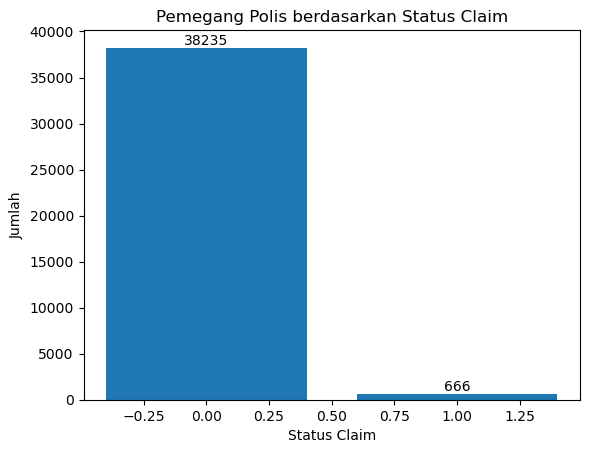

In [29]:
#  Status Claim
claim = df.groupby(by=['Claim']).size().reset_index(name='counts')

plt.bar(claim['Claim'], claim['counts'])
plt.xlabel('Status Claim')
plt.ylabel('Jumlah')
plt.title('Pemegang Polis berdasarkan Status Claim')

# Menambahkan keterangan angka pada setiap bar
for i, count in enumerate(claim['counts']):
    plt.text(i, count+0.1, str(count), ha='center', va='bottom')

plt.show()

In [30]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,15,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Duration,float64,0,0.0,436,"[365.0, 4.0, 19.0, 20.0, 8.0, 2.0, 25.0, 90.0,..."
5,Destination,object,0,0.0,136,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
6,Net Sales,float64,0,0.0,988,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
7,Commision (in value),float64,0,0.0,886,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
8,Age,int64,0,0.0,88,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."
9,Claim,int64,0,0.0,2,"[0, 1]"


#### Remove Unused Data

In [31]:
def binningFunction(col,cut_points,labels=None):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    print(break_points)
    if not labels:
        labels = range(len(cut_points)+1)
    colBin = pd.cut(col,bins = break_points,labels=labels, include_lowest = True)
    return colBin

In [32]:
cut_points = [0,150,250,350,450]
labels = ['<=0','1-150','151-250','251-350','351-450','>450']
df['NetSalesBin']= binningFunction(df['Net Sales'],cut_points,labels)
df.head()

[-357.5, 0, 150, 250, 350, 450, 682.0]


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,NetSalesBin
0,C2B,Airlines,Online,Annual Silver Plan,365.0,SINGAPORE,216.0,54.0,57,0,151-250
1,EPX,Travel Agency,Online,Cancellation Plan,4.0,MALAYSIA,10.0,0.0,33,0,1-150
2,JZI,Airlines,Online,Basic Plan,19.0,INDIA,22.0,7.7,26,0,1-150
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20.0,UNITED STATES,112.0,0.0,59,0,1-150
4,C2B,Airlines,Online,Bronze Plan,8.0,SINGAPORE,16.0,4.0,28,0,1-150


Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Agency` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
2. Merubah fitur/kolom `Agency Type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `Distribution Channel` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `Product Name` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
5. Merubah fitur/kolom `Destination` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.

In [33]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type','Distribution Channel','NetSalesBin']),
    ('binary', ce.BinaryEncoder(), ['Agency','Product Name','Destination'])
], remainder='passthrough')

In [34]:
x = df.drop(columns=['Claim','Net Sales'])
y = df['Claim']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2023)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31120, 9), (7781, 9), (31120,), (7781,))

In [49]:
y_train.value_counts()

0    30587
1      533
Name: Claim, dtype: int64

## Modeling & Evaluation

In [45]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [46]:
# library

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

In [52]:
list_algo = [logreg, knn, dt, rf, xgb]
list_score = []
list_mean = []
list_std = []

for model in list_algo:
    
    # pipeline berisi preprocessing dan modeling
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('resample', SMOTE()),
        ('modeling', model)
    ])

    cv_score = cross_val_score(
        estimator= pipe_model,
        X= x_train,
        y= y_train,
        cv= 5,
        scoring='recall' # recall
    )

    list_score.append(cv_score.round(1))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

df_cv = pd.DataFrame({
    'algo': [str(x) for x in list_algo],
    'recall_mean': list_mean,
    'std': list_std,
    'all_score': list_score
})

df_cv

,algo,recall_mean,std,all_score
0,LogisticRegression(),0.695927,0.039394,"[0.6, 0.7, 0.7, 0.7, 0.7]"
1,KNeighborsClassifier(),0.348916,0.077169,"[0.3, 0.4, 0.4, 0.2, 0.4]"
2,DecisionTreeClassifier(),0.118145,0.018019,"[0.1, 0.1, 0.1, 0.1, 0.1]"
3,RandomForestClassifier(),0.067554,0.023262,"[0.1, 0.1, 0.1, 0.0, 0.1]"
4,"XGBClassifier(base_score=None, booster=None, c...",0.052513,0.009464,"[0.1, 0.0, 0.1, 0.0, 0.1]"


# Hyperparameter

In [53]:
from jcopml.tuning import grid_search_params as gsp
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [64]:
# parameter
params = {'algo__fit_intercept': [True, False],
 'algo__C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [65]:
# create pipeline
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('resample', SMOTE()),
        ('algo', logreg)
    ])

# Use GridSearchCV to find the best hyperparameters
gridsearch_logreg = GridSearchCV(pipe_model, params, cv=5, n_jobs=-1, scoring='recall', verbose=3)



# Fit the random search model
gridsearch_logreg.fit(x_train, y_train)


# Print the best hyperparameters
print(gridsearch_logreg.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.7053253394463058


In [66]:
gridsearch_logreg.best_params_

{'algo__C': 10, 'algo__fit_intercept': True}

In [67]:
model_logreg_damar = gridsearch_logreg.best_estimator_

# Evaluation Matrix and Analisis

In [68]:
from sklearn.metrics import recall_score

y_pred_fmodel = model_logreg_damar.predict(x_test)
print(classification_report(y_test,y_pred_fmodel))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      7648
           1       0.05      0.64      0.10       133

    accuracy                           0.80      7781
   macro avg       0.52      0.72      0.49      7781
weighted avg       0.98      0.80      0.87      7781



Model overfitting karena data untuk prediksi nilai positive kurang

In [71]:
df['Claim'].value_counts()

0    38235
1      666
Name: Claim, dtype: int64

Diatas bukti datanya sangat imbalance, sehingga apabila dilakukan oversampling technique model akan overfitting

# feature importances

,feature,importance,stdev
3,Product Name,0.045572,0.001405
0,Agency,0.040418,0.001306
1,Agency Type,0.034544,0.000491
5,Destination,0.013213,0.000694
7,Age,0.008136,0.000806
4,Duration,0.004955,0.000560
6,Commision (in value),0.002577,0.000454
2,Distribution Channel,0.000720,0.000120
8,NetSalesBin,-0.000129,0.000510


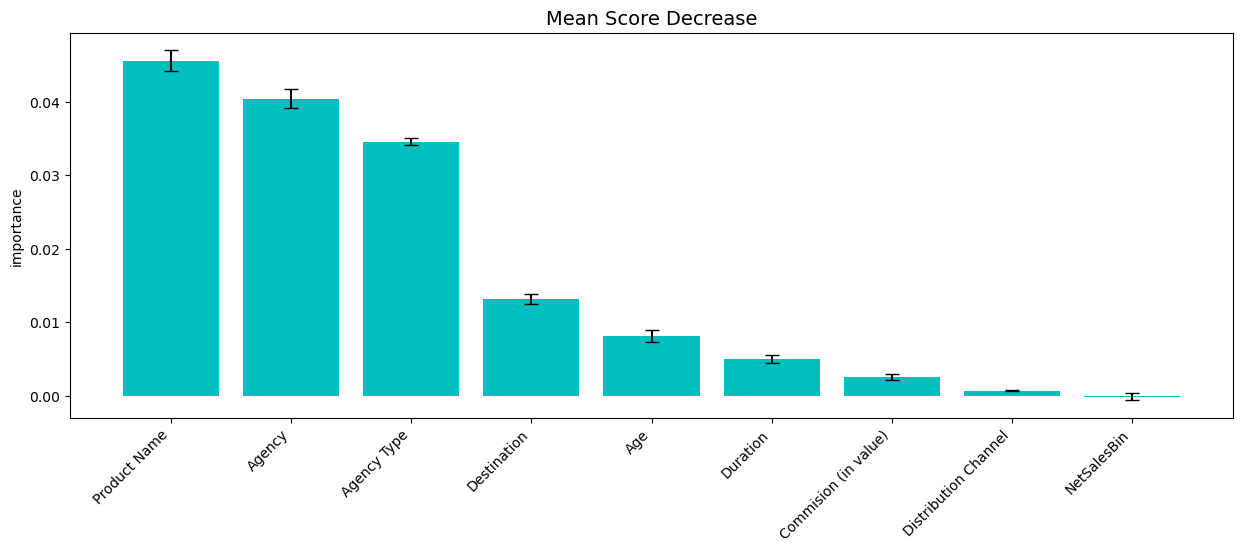

In [72]:
from jcopml.feature_importance import mean_score_decrease

mean_score_decrease(x_train, y_train, model_logreg_damar, plot=True)

 Terlihat bahwa feature yang paling berpengaruh dalam pengambilan keputusan claim atau tidak adalah Product Name, lalu Agency dan Agency Type. Perlu diperhatikan bahwa fitur-fitur ini sangat mempengaruhi performa model dalam mempelajari explanatory variable untuk memprediksi response variable sehingga nantinya perlu dianalisis lebih lanjut ke fitur-fitur tersebut.

# Kesimpulan
* Data Target sangat tidak balance
* Model menjadi overfitting (score dari benchmark model = 0.704 menjadi 0.64 setelah hyperparameter tuning)
* Dari recall dapat dianalisis bahwa model kita masih beresiko untuk perusahaan untuk membayar kerugian atas claim client karena performance model dan dataset masih terbilang kurang memenuhi. 


# Rekomendasi

Diperlukan data yang lebih untuk nilai positif target agar membuat target variabel lebih balance sehingga membantu model lebih robust. Recall terlihat dari score 0.705 menjadi 0.64 berarti adanya overfitting didalam model yang diakibatkan karena kekurangan data yang sangat banyak untuk nilai positif target (1 = 1.7% dari total target).